<table class="table table-bordered">
    <tr>
        <th style="width:250px;">
            <img src='./images/RISE_FFS_2_Light BG@4x.png' style="background-color:white; width: 100%; height: 100%; padding: 20px">
        </th>
        <th style="text-align:center;">
            <h1>Regression Analysis</h1>
            <h3>IBF TFIP</h3>
        </th>
    </tr>
</table>

<a id=contentpage></a>
### Objectives
After completing this practical exercise, you should be able to understand:
- [1: Least Squares](#act1)
- [2: $R^2 $ ](#ac2)
- [3: Multivariate Linear Regression, California Housing Data (Price vs HouseAge & AveRooms)](#ac3)
- [4: `statsmodel` and Summary Tables](#ac4)
- [5: Linear Regression Assumptions](#ac5)
- [6: Linear Regression with Endcoded Categorical Data](#ac6)
- [7: Regularization (optional reading)](#ac7)
- [8: Classification Prediction (optional reading)](#ac8)

<a id="ac1"></a>

# 1: Least Squares

In [1]:
import pandas as pd
customer_data = pd.DataFrame({'Foot_Length': [22.5, 20, 26.7, 30, 23.3, 22.5, 20, 26.7, 30, 23.3], 
                              'Height':[1.65, 1.68, 1.75, 1.82, 1.70,1.65, 1.68, 1.75, 1.82, 1.70]})
customer_data.head()

,Foot_Length,Height
0,22.5,1.65
1,20.0,1.68
2,26.7,1.75
3,30.0,1.82
4,23.3,1.70


In [2]:
X = customer_data.iloc[:, :-1].values # Ulnar
display(X)

y = customer_data.iloc[:, -1].values # Height
display(y)

array([[22.5],
       [20. ],
       [26.7],
       [30. ],
       [23.3],
       [22.5],
       [20. ],
       [26.7],
       [30. ],
       [23.3]])

array([1.65, 1.68, 1.75, 1.82, 1.7 , 1.65, 1.68, 1.75, 1.82, 1.7 ])

## Train the model

In [3]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X, y)

LinearRegression()

## Linear Regression Co-efficients via Built-in Class Attributes

In [4]:
# beta 1 or slope
X1_grad = lm.coef_[0]
X1_grad

0.015794669299111563

In [5]:
# beta 0 or y-intercept value
y_intc = lm.intercept_
y_intc

1.3330306021717666

## Visualising the Data and Regression Line

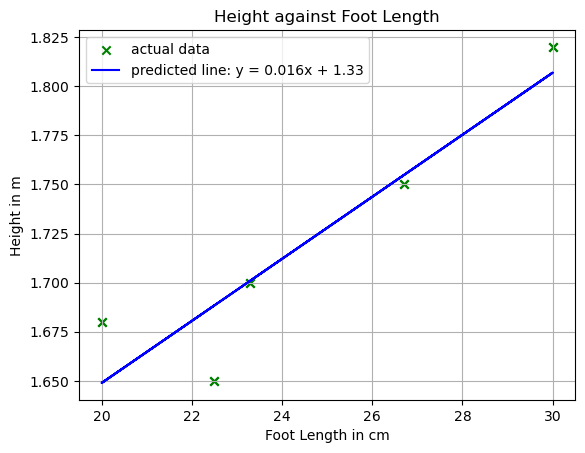

In [6]:
import matplotlib.pyplot as plt

# scatter plot with coordinates x and y
plt.scatter(X, y, color='green', marker='x', label = "actual data")

# plot the regression line. Pass in parameters x and predicted y values
plt.plot(X, lm.predict(X), 'b', label = f"predicted line: y = {round(X1_grad,3)}x + {round(y_intc,2)}")

# Plot title and labels
plt.title('Height against Foot Length')
plt.ylabel('Height in m')
plt.xlabel('Foot Length in cm')

plt.grid()
plt.legend()

plt.show()

### 1i) Linear Regression Co-efficients by Hand

In [7]:
X_bar = (sum(X)/len(X))[0]
X_bar

24.5

In [8]:
y_bar = sum(y)/len(y)
y_bar

1.72

In [9]:
S_xx = (sum(X**2)[0] - (sum(X)**2/len(X)))[0]
S_xx

121.5600000000004

In [10]:
import numpy as np

S_xy = np.sum(X*y.reshape(-1,1)) - (np.sum(X) * np.sum(y))/len(X)
S_xy

1.9200000000000728

In [11]:
# beta 1 or "b" or slope
hand_X1_grad = S_xy/S_xx
hand_X1_grad

0.015794669299112097

In [12]:
# beta 0 or "a" or y-intercept value
hand_y_intc = y_bar - (hand_X1_grad * X_bar)
hand_y_intc

1.3330306021717537

Therefore, the equation of our simple linear regression model is:

$$\textrm{Height} =  0.016 \times \textrm{Foot_Length} + 1.33$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor Class object. Attributes in Python are different than methods and usually return a simple value or an array of values.

### 1ii) Prediction

In [13]:
# given any value of X, eg 27.5 cm
# by hand
hand_X1_grad * 27.5 + hand_y_intc

1.7673840078973364

In [14]:
# given any value of X, eg 27.5 cm
# by built-in class attribute
lm.predict([[27.5]])[0]

1.7673840078973346

[Back to top](#contentpage)

<a id="ac2"></a>

# 2: $R^2 $

### 2i) Calculating $R^2 $ by Hand

In [15]:
y_bar

1.72

In [16]:
y_pred = lm.predict(X)

# Sum of Squares Regression, measures the explained variability by your line. (aka Explained Sum of Squares – ESS)
SSR = sum((y_pred-y_bar)**2)
SSR

0.03032576505429426

In [17]:
# Total Sum of Squares, measures the total variability of the dataset (aka Total Sum of Squares – TSS)
TSS = sum((y-y_bar)**2)
TSS

0.03560000000000006

In [18]:
hand_R2 = SSR/TSS
hand_R2

0.8518473329857924

### 2ii) Extracting $R^2 $ via Built-in Class Attribute

In [19]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.8518473329857923

### 2iii) Evaluation using $R^2 $ value. 

The R-squared value tells us that 85% of the variability of Height is explained by Foot_Length. 

## Assumptions of Simple Linear Regression

---

There are some critical assumptions involved in SLR that you must be aware of:


|Assumptions|Checks|
|:---|:---|
|1. **Linearity:** Y and X must have an approximately linear relationship.|Plot target ~ predictor to observe trend|
|2. **Independence:** Errors (residuals) $\varepsilon_i$ and $\varepsilon_j$ must be independent of one another for any $i \neq j$.|Check for autocorrelation, especially if data is taken over time|
|3. **Normality:** The errors (residuals) follow a Normal distribution with mean 0.|Check using Quantile Quantile plot, it should form a straight line|
|4. **Equality of Variances** (Homoscedasticity of errors): The errors (residuals) should have a roughly consistent pattern, regardless of the value of X. (There should be no discernable relationship between X and the residuals.)|Check using residual plot - there should be no pattern in the residuals, and should be random.|



The mnemonic **LINE** is a useful way to remember these four assumptions.

Lengthier discussions of the four main assumptions and how one can evaluate or test for each of these [can be found here](http://people.duke.edu/~rnau/testing.htm).

If all four assumptions are true, the following holds: 

### $$ Y_i \sim N(\beta_0 + \beta_1 X_i, \sigma) $$

[Back to top](#contentpage)

<a id="ac3"></a>
# 3: Multivariate Linear Regression, Cali Housing Data (Price vs HouseAge & AveRooms)
<br> 
$$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 \text{* HouseAge} + \hat{\beta}_2 \text{* AveRooms} $$

## Import Dataset

In [20]:
## Import Data set
from sklearn.datasets import fetch_california_housing
cali_housing_original = fetch_california_housing()

In [21]:
# extracting X column data from cali_housing_original
cali_housing_X = cali_housing_original.data
cali_housing_X[:5]

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])

In [22]:
# converting cali_housing_cols into dataframe
df_cali_housing = pd.DataFrame(cali_housing_X, columns = cali_housing_original.feature_names)
df_cali_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [23]:
# extracting y column data from cali_housing_original, in hundreds of thousands of USD
cali_housing_y = cali_housing_original.target
cali_housing_y[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

In [24]:
# inserting y column data into df_cali_housing
df_cali_housing["Price"] = cali_housing_y
df_cali_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [25]:
# simplify the dataset to predict "Price" based on "HouseAge" and "AveRooms"
df_cali_housing = df_cali_housing[["HouseAge", "AveRooms", "Price"]]
df_cali_housing.head()

,HouseAge,AveRooms,Price
0,41.0,6.984127,4.526
1,21.0,6.238137,3.585
2,52.0,8.288136,3.521
3,52.0,5.817352,3.413
4,52.0,6.281853,3.422


## Train the Model

In [26]:
# we shall now regard "Price" as our y variable, and "HouseAge" and "AveRooms" 
# as 2 multivariate X columns helping us to predict y

# create an instance of the linear regression class
lm_cali_housing = LinearRegression()

# assign X columns and y column
X_cali_housing = df_cali_housing[["HouseAge", "AveRooms"]]
y_cali_housing = df_cali_housing[["Price"]]

# train it using the data, independent features followed by dependent variable.
lm_cali_housing.fit(X_cali_housing, y_cali_housing)

LinearRegression()

### 3i) Extract Model Co-efficients

In [27]:
# beta 0 or intercept value
b0_cali_housing = lm_cali_housing.intercept_[0]
print(b0_cali_housing)

# beta_1 and beta_2
gradient_cali_housing = lm_cali_housing.coef_[0]
print(gradient_cali_housing)

1.2859129393816993
[0.01210433 0.08030639]


In [28]:
# beta_1
b1_cali_housing = lm_cali_housing.coef_[0][0]
print(b1_cali_housing)

# beta_2
b2_cali_housing = lm_cali_housing.coef_[0][1]
print(b2_cali_housing)

0.012104332302929238
0.08030638969009472


<br>
Therefore, the equation of our multivariate linear regression model is:

$$\textrm{Price} = 1.28591294  + 0.01210433 \times \textrm{Age} + 0.08030639 \times \textrm{BMI}$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor Class object. Attributes in Python are different than methods and usually return a simple value or an array of values.

### 3ii) Predict

In [29]:
X_cali_housing_sample = np.array([[52.0, 6]])
X_cali_housing_sample

array([[52.,  6.]])

In [30]:
y_cali_housing_pred = lm_cali_housing.predict(X_cali_housing_sample)
y_cali_housing_pred

C:\Users\liu nelson\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2.39717656]])

Manual calculation by hand:

In [31]:
y_pred = 1.28591294 + 0.01210433 * X_cali_housing_sample[0,0] + 0.08030639*X_cali_housing_sample[0,1]
y_pred

2.39717644

Therefore, our model predicts that the resale price of a 52-year old House with 6 AveRooms is US$ 239,717.64.

### 3iii) Visualize Price vs HouseAge & AveRooms

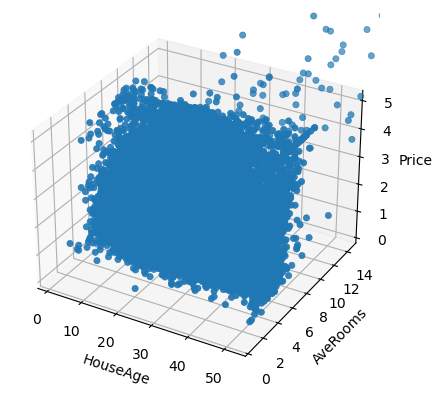

In [32]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


x_axis_cali_housing_3d = df_cali_housing.loc[:,["HouseAge"]].values
y_axis_cali_housing_3d = df_cali_housing.loc[:,["AveRooms"]].values
z_axis_cali_housing_3d = df_cali_housing.loc[:,["Price"]].values # dependent variable, usually y in a 2D plot


ax = plt.axes(projection='3d')
ax.scatter(x_axis_cali_housing_3d, y_axis_cali_housing_3d, z_axis_cali_housing_3d, cmap='viridis', linewidth=0.5)

ax.axes.set_ylim3d(bottom=0, top=15)

ax.set_xlabel('HouseAge')
ax.set_ylabel('AveRooms')

ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('Price', rotation = 0)

plt.show();

[Back to top](#contentpage)

<a id="ac4"></a>
## 4: `statsmodels` and Summary Tables


### 4i) Model Summary via statsmodels

In [33]:
import statsmodels.api as sm

# Describe Model, remember to have add_constant as part of syntax
sm_ols_cali_housing = sm.OLS(y_cali_housing, sm.add_constant(X_cali_housing))    

model_sm_ols_cali_housing = sm_ols_cali_housing.fit()       # Fit model

display(model_sm_ols_cali_housing.summary())   # Summarize model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     431.1
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          3.69e-184
Time:                        14:46:39   Log-Likelihood:                -31820.
No. Observations:               20640   AIC:                         6.365e+04
Df Residuals:                   20637   BIC:                         6.367e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2859      0.028     45.668      0.000       1.231       1.341
HouseAge       0.0121      0.001     19.128      0.000       0.011       0.013
AveRooms       0.0803      0.003     24.948      0.000       0.074       0.087
==============================================================================
Omnibus:                     1914.740   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2591.127
Skew:                           0.771   Prob(JB):                         0.00
Kurtosis:                       3.796   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note the relatively weak $R^2$ value at this point. Existing X variables seem insuffcient to form a strong predictive model. We shall now use more features in our Multivariate Linear Regression.

In [34]:
## Import Data set
from sklearn.datasets import fetch_california_housing
cali_housing_original = fetch_california_housing()

In [35]:
# converting cali_housing_cols into dataframe
df_cali_housing = pd.DataFrame(cali_housing_X, columns = cali_housing_original.feature_names)
df_cali_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [36]:
# extracting y column data from cali_housing_original, in hundreds of thousands of USD
cali_housing_y = cali_housing_original.target
cali_housing_y[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

In [37]:
# inserting y column data into df_cali_housing
df_cali_housing["Price"] = cali_housing_y
df_cali_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [38]:
df_cali_housing = df_cali_housing[["MedInc", "HouseAge", "AveRooms", "Latitude", "Price"]]

In [39]:
# we shall now regard "Price" as our y variable, use all the other columns as X columns
# helping us to predict y

# create an instance of the linear regression class
lm_cali_housing_2 = LinearRegression()

# assign X columns and y column
X_cali_housing_2 = df_cali_housing.iloc[:,:-1]
y_cali_housing = df_cali_housing[["Price"]]

# train it using the data, independent features followed by dependent variable.
lm_cali_housing_2.fit(X_cali_housing_2, y_cali_housing)

LinearRegression()

In [40]:
import statsmodels.api as sm

# Describe Model, remember to have add_constant as part of syntax
sm_ols_cali_housing_2 = sm.OLS(y_cali_housing, sm.add_constant(X_cali_housing_2))    

model_sm_ols_cali_housing_2 = sm_ols_cali_housing_2.fit()       # Fit model

display(model_sm_ols_cali_housing_2.summary())   # Summarize model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     5566.
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:46:39   Log-Likelihood:                -24689.
No. Observations:               20640   AIC:                         4.939e+04
Df Residuals:                   20635   BIC:                         4.943e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6273      0.096     16.942      0.000       1.439       1.816
MedInc         0.4363      0.003    139.197      0.000       0.430       0.442
HouseAge       0.0170      0.000     37.771      0.000       0.016       0.018
AveRooms      -0.0212      0.002     -8.759      0.000      -0.026      -0.016
Latitude      -0.0454      0.003    -17.179      0.000      -0.051      -0.040
==============================================================================
Omnibus:                     4312.698   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10939.935
Skew:                           1.145   Prob(JB):                         0.00
Kurtosis:                       5.734   Cond. No.                         809.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note the much improved $R^2$ value of 0.519 at this point. We shall now use this model going forwards in this practical.

[Back to top](#contentpage)

<a id="ac5"></a>
## 5: Linear Regression Assumptions
<br>

### 5i) Residual Plots: Check to see if the residuals is randomly scattered around the horizontal line. You should not see much of a trend, diverging or converging points


eval_env: 1


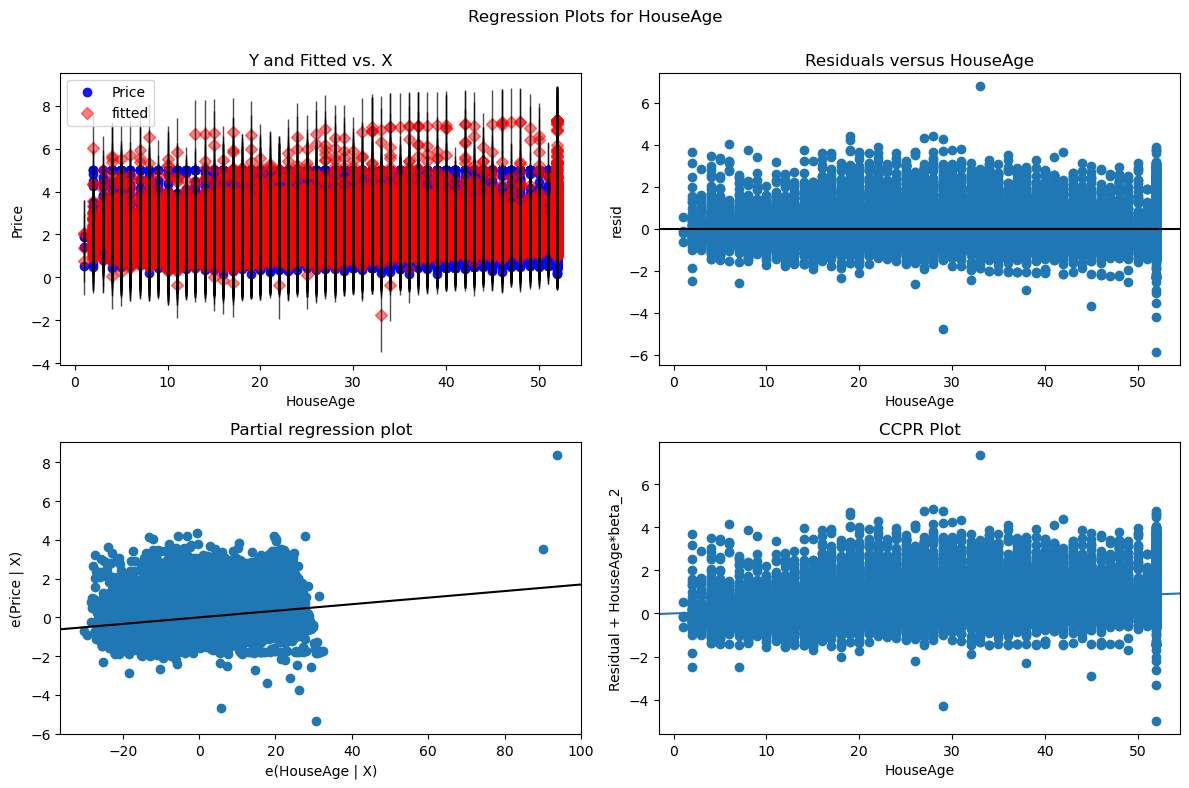

In [41]:
# using OLS model built by statsmodel in earlier part of notebook

fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(model_sm_ols_cali_housing_2, 'HouseAge', fig=fig)

### 5ii) Check for Normality using qqplot (quantile-quantile plot).
<br>
If normally distributed it would rougly lie on the diagonal line

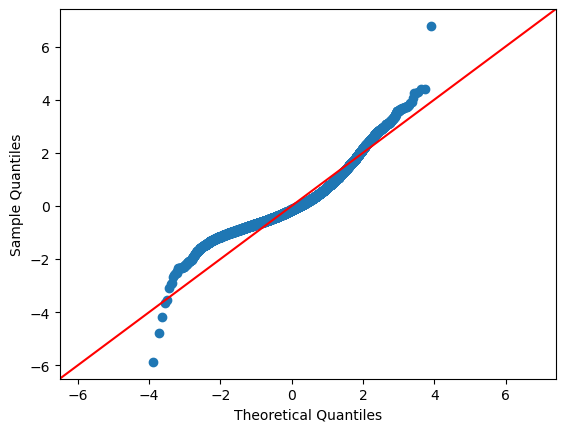

In [42]:
res_cali_housing = model_sm_ols_cali_housing_2.resid # residuals
fig = sm.qqplot(res_cali_housing,line='45')

Normality seems to fail quickly at lower values, otherwise more than 90% of the values seem Normally Distributed.

### 5iii) Check for Correlation between Variables

In [43]:
corr = df_cali_housing.corr()
corr.style.background_gradient(cmap='coolwarm')

,MedInc,HouseAge,AveRooms,Latitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.079809,0.688075
HouseAge,-0.119034,1.000000,-0.153277,0.011173,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.106389,0.151948
Latitude,-0.079809,0.011173,0.106389,1.000000,-0.144160
Price,0.688075,0.105623,0.151948,-0.144160,1.000000


All X variables are not strongly correlated with each other, they are suitable to be simultaneously used in the linear model.

[Back to top](#contentpage)

<a id="ac6"></a>
## 6:  Multiple Linear Regression with Categorical Data

<br>
Looking back at Activity 1's Dataset of Height vs Foot Length, we have a R-squared value of 0.852.

Let's seek to improve it by tapping on an additional categorical "Gender" column and converting it into numerical information for a stronger predictive model with a higher $R^2$ value closer to 1.

$$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X1 + \hat{\beta}_2 X2 + ...???$$

<br>


## Import Dataset

In [44]:
import pandas as pd

customer_data = pd.DataFrame({'Gender':['F', 'M', 'M', 'M', 'F', 'F', 'M', 'M', 'M', 'F'],
                              'Foot_Length': [22.5, 20, 26.7, 30, 23.3, 22.5, 20, 26.7, 30, 23.3], 
                              'Height':[1.65, 1.68, 1.75, 1.82, 1.70,1.65, 1.68, 1.75, 1.82, 1.70]
                             })
customer_data.head()

,Gender,Foot_Length,Height
0,F,22.5,1.65
1,M,20.0,1.68
2,M,26.7,1.75
3,M,30.0,1.82
4,F,23.3,1.70


### 6i) Encode the Data for the Categorical Variables


In [45]:
customer_ohe = pd.get_dummies(customer_data, drop_first=False)
customer_ohe.head()

,Foot_Length,Height,Gender_F,Gender_M
0,22.5,1.65,1,0
1,20.0,1.68,0,1
2,26.7,1.75,0,1
3,30.0,1.82,0,1
4,23.3,1.70,1,0


In [46]:
customer_ohe = customer_ohe[["Gender_F", "Gender_M", "Foot_Length", "Height"]]
customer_ohe.head()

,Gender_F,Gender_M,Foot_Length,Height
0,1,0,22.5,1.65
1,0,1,20.0,1.68
2,0,1,26.7,1.75
3,0,1,30.0,1.82
4,1,0,23.3,1.70


## Split the dataset into Train and Test Set
<br>
For completeness this is how you could set aside some data to test the robustness of the model on unseen data.


In [47]:
from sklearn.model_selection import train_test_split
# split into train test set, 20% for test
X_train_foot, X_test_foot, y_train_foot, y_test_foot = train_test_split(customer_ohe.iloc[:,:-1], customer_ohe["Height"], 
                                                                        test_size = 0.2, random_state = 34)

In [48]:
from sklearn.linear_model import LinearRegression
lm_foot = LinearRegression()
lm_foot.fit(X_train_foot, y_train_foot)

LinearRegression()

### 6ii) Check the coefficients and $R^2$ value

In [49]:
# beta 0 or intercept value
print(lm_foot.intercept_)

# All the coefficients of the independent variables for BEDOK, BUKIT TIMAH, CENTRAL AREA, age_of_flat, floor_area_sqm
print(lm_foot.coef_)

# R-squared value of the model on train data
r2_train_foot = (lm_foot.score(X_train_foot, y_train_foot))
print(f"train R\u00b2 score is {r2_train_foot:.3f}.")

# R-squared value of the model on test data
r2_test_foot = (lm_foot.score(X_test_foot, y_test_foot))
print(f"test R\u00b2 score is {r2_test_foot:.3f}.")

1.3821723409701776
[-0.01932516  0.01932516  0.01363113]
train R² score is 0.949.
test R² score is 0.389.


Compare the train $R^2$ value obtained here (0.949) with the $R^2$ value obtained in activity 1 & 2 (0.852), we see that this model performs better with the added predictor "Gender", on train data.

Do note however, that the model performs much more badly on test data. This is known as overfitting, where the model works well within the controlled environment, but is unlikely to do as well when encountering combinations of X data that are not so similar to existing training X data.

This implies that for future X values, this model might not predict well, which detracts from the model's key purpose. (Predicting well on past events isn't as useful as predicting the future!)

Some key techniques used to deal with overfitting involve use of Regularization, which we will be examining next.

## Equation of model
<br>

Therefore, the equation of our multivariate linear regression model is:

$$\textrm{Height} = 1.3821723409701776 + (-0.01932516) \times \textrm{Gender_F} + 0.01932516  \times \textrm{Gender_M} +  0.01363113  \times \textrm{Foot_Length}$$

The train $R^2$ value for this data is 0.949, which means 94.9% of the train data height variability is explained by Gender, and Foot Length.

The test $R^2$ value for this data is 0.389, which means only 38.9% of the test data height variability is explained by Gender, and Foot Length.

## Evaluate the model

In [50]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


y_pred_foot = lm_foot.predict(X_train_foot)


print("Train Model Metrics:")
print()

# R-squared (closer to 1 the better, but beware of 1.0 values)
print(f"Train R\u00b2: ", r2_score(y_train_foot, y_pred_foot))

# Root Mean Square Error (lower error the better)
print("Train RMSE: ",np.sqrt(mean_squared_error(y_train_foot, y_pred_foot)))

# Mean Absoulte Error (lower error the better)
print("Train MAE: ", mean_absolute_error(y_train_foot, y_pred_foot))

print()
print()

print("Test Model Metrics:")
print()


y_pred_foot = lm_foot.predict(X_test_foot)

# R-squared (closer to 1 the better, but beware of 1.0 values)
print(f"Test R\u00b2: ", r2_score(y_test_foot, y_pred_foot))

# Root Mean Square Error (lower error the better)
print("Test RMSE: ",np.sqrt(mean_squared_error(y_test_foot, y_pred_foot)))

# Mean Absoulte Error (lower error the better)
print("Test MAE: ", mean_absolute_error(y_test_foot, y_pred_foot))

Train Model Metrics:

Train R²:  0.9489953462440635
Train RMSE:  0.013664730133069748
Train MAE:  0.012611192883655392


Test Model Metrics:

Test R²:  0.38862932764623903
Test RMSE:  0.019547548956866723
Test MAE:  0.019547548956866723


[Back to top](#contentpage)

## Review: common metrics for evaluating regression models

---

The [root mean squared error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) is a standard measure of model performance. It is the square root of the mean of the sum of squared residuals:

### $$ \operatorname{RMSE}= \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y_i} - y_i)^2} $$

The smaller the root mean squared error, the better your model fits the data. 

You are already familiar with the [coefficient of determination $R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination):

### $$ R^2 = 1 - \frac{SS_{reg}}{SS_{tot}} = \frac{SS_{tot} - SS_{reg}}{SS_{tot}}  $$

Where the regression sum of squares is the sum of squared residuals for our model:

$SS_{reg}=\sum_i (y - \hat{y})^2$

And the total sum of squares is the sum of squared residuals for the *baseline* model. This is essentially the variance of our target.

$SS_{tot} = \sum_i (y_i-\bar{y})^2$

$R^2$ is the most common metric to evaluate a regression and is the default scoring measure in sklearn.

**Calculate the RMSE of your model by leveraging `sklearn.metrics.mean_squared_error`.**

## A note on negative $R^2$ values

---

Over the course of this class you may encounter negative $R^2$ values. This may seem impossible, and it is in the standard scenario where we are calculating the $R^2$ score on the data we fit the model with.

However, if you fit your model on one sample of data, *then score the model on new data not used to fit the model*, it is possible to end up with negative $R^2$.

**What does it mean to have a negative $R^2$?**

Remember that $R^2$ is 1 minus the error of your regression model divided by the error of the baseline model. A negative $R^2$ means that the regression model is performing *worse* than the baseline model. In the context of fitting our data on one sample of data and scoring on another sample, this means that we would have been better off making predictions on the test sample just using the mean of the target variable in our training set.


[Back to top](#contentpage)

<a id="ac7"></a>
## 7:  Regularization (optional reading)

We will be attempting to use all 3 types of Regularization to help combat overfitting observed in Activity 6:

- Lasso Regression (L1 Regularization)
- Ridge Regression (L2 Regularization)
- ElasticNet Regression (L1&L2 Regularization)

However, we will need to use a much larger dataset to demonstrate this, and thus we will be using sklearn's wine dataset.

Reminder: Regularization is the technique of adding additional error terms when seeking to minize prediction errors on train data, and these additional error terms are very dependent on the proposed beta coefficients, or gradients of each X variable/feature.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


## Load Wine Dataset

In [52]:
df_wine = pd.read_csv("./data/winequality.csv")
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [53]:
# df_wine = df_wine.drop(columns=["quality"])

We will use "quality" as our regression target variable to be predicted. All other columns are independent X columns helping us to predict y column, "quality".

## Split the dataset into Train and Test Set

In [54]:
from sklearn.model_selection import train_test_split
# split into train test set, 20% for test
X_train, X_test, y_train, y_test = train_test_split(df_wine.iloc[:,:-1], df_wine.iloc[:,-1], 
                                                                        test_size = 0.2, random_state = 12)

### 7i) Tapping on Built-In Classes for Regularization in Regression

## Vanilla Multivariate Linear Regression

In [55]:
# import Linear Regression
from sklearn.linear_model import LinearRegression

# Train the model
linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred_train_linear = linear.predict(X_train)
y_pred_test_linear = linear.predict(X_test)

In [56]:
round((r2_score(y_train, y_pred_train_linear)),3)

0.304

In [57]:
print("Linear Train Model Metrics:")
print()

# R-squared (closer to 1 the better, but beware of 1.0 values)
print(f"Train R\u00b2: ", round((r2_score(y_train, y_pred_train_linear)),3))

# Root Mean Square Error (lower error the better)
print("Train RMSE: ", round((np.sqrt(mean_squared_error(y_train, y_pred_train_linear))),3))

# Mean Absoulte Error (lower error the better)
print("Train MAE: ", round((mean_absolute_error(y_train, y_pred_train_linear)),3))

print()
print()

print("Linear Test Model Metrics:")
print()

# R-squared (closer to 1 the better, but beware of 1.0 values)
print(f"Test R\u00b2: ", round((r2_score(y_test, y_pred_test_linear)),3))

# Root Mean Square Error (lower error the better)
print("Test RMSE: ", round((np.sqrt(mean_squared_error(y_test, y_pred_test_linear))),3))

# Mean Absoulte Error (lower error the better)
print("Test MAE: ", round((mean_absolute_error(y_test, y_pred_test_linear)),3))


Linear Train Model Metrics:

Train R²:  0.304
Train RMSE:  0.724
Train MAE:  0.562


Linear Test Model Metrics:

Test R²:  0.244
Test RMSE:  0.776
Test MAE:  0.592


In [58]:
# displaying Linear coefficients
linear_coeff = pd.DataFrame()
linear_coeff["Columns"] = X_train.columns
linear_coeff['Coefficient Estimate'] = pd.Series(linear.coef_)
 
display(linear_coeff)

,Columns,Coefficient Estimate
0,fixed acidity,0.077884
1,volatile acidity,-1.301497
2,citric acid,-0.108627
3,residual sugar,0.045452
4,chlorides,-0.563678
5,free sulfur dioxide,0.007448
6,total sulfur dioxide,-0.002808
7,density,-64.292014
8,pH,0.505663
9,sulphates,0.717604


## Lasso Regression

The built-in parameter alpha in Lasso here, is actually the lambda paramter in the mathematical equation, which allows us to strengthen or weaken the penalty from Lasso. Do not confuse this with the alpha from ElasticNet's mathematical equation, which we will go through in a bit.

In [59]:
# import Lasso Regression
from sklearn.linear_model import Lasso
 
# Train the model
lasso = Lasso(alpha = 0.00125) # default alpha value is 1, weaken it, lower it towards zero but do not put negative values
lasso.fit(X_train, y_train)

y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

In [60]:
print("Lasso Train Model Metrics:")
print()

# R-squared (closer to 1 the better, but beware of 1.0 values)
print(f"Train R\u00b2: ", round((r2_score(y_train, y_pred_train_lasso)),3))

# Root Mean Square Error (lower error the better)
print("Train RMSE: ", round((np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))),3))

# Mean Absoulte Error (lower error the better)
print("Train MAE: ", round((mean_absolute_error(y_train, y_pred_train_lasso)),3))

print()
print()

print("Lasso Test Model Metrics:")
print()

# R-squared (closer to 1 the better, but beware of 1.0 values)
print(f"Test R\u00b2: ", round((r2_score(y_test, y_pred_test_lasso)),3))

# Root Mean Square Error (lower error the better)
print("Test RMSE: ", round((np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))),3))

# Mean Absoulte Error (lower error the better)
print("Test MAE: ", round((mean_absolute_error(y_test, y_pred_test_lasso)),3))

Lasso Train Model Metrics:

Train R²:  0.299
Train RMSE:  0.727
Train MAE:  0.566


Lasso Test Model Metrics:

Test R²:  0.245
Test RMSE:  0.776
Test MAE:  0.594


In [61]:
# displaying Lasso coefficients
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
display(lasso_coeff)

,Columns,Coefficient Estimate
0,fixed acidity,0.002709
1,volatile acidity,-1.385576
2,citric acid,-0.014448
3,residual sugar,0.020777
4,chlorides,-0.000000
5,free sulfur dioxide,0.007506
6,total sulfur dioxide,-0.002519
7,density,-0.000000
8,pH,0.141372
9,sulphates,0.449164


## Ridge Regression

In [62]:
# import Ridge Regression
from sklearn.linear_model import Ridge
 
# Train the model
# default alpha value is 1, can weaken it by lowering it towards zero but do not put negative values
ridge = Ridge(alpha = 0.00225) 
ridge.fit(X_train, y_train)

y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

In [63]:
print("Ridge Train Model Metrics:")
print()

# R-squared (closer to 1 the better, but beware of 1.0 values)
print(f"Train R\u00b2: ", round((r2_score(y_train, y_pred_train_ridge)),3))

# Root Mean Square Error (lower error the better)
print("Train RMSE: ", round((np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))),3))

# Mean Absoulte Error (lower error the better)
print("Train MAE: ", round((mean_absolute_error(y_train, y_pred_train_ridge)),3))

print()
print()

print("Ridge Test Model Metrics:")
print()

# R-squared (closer to 1 the better, but beware of 1.0 values)
print(f"Test R\u00b2: ", round((r2_score(y_test, y_pred_test_ridge)),3))

# Root Mean Square Error (lower error the better)
print("Test RMSE: ", round((np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))),3))

# Mean Absoulte Error (lower error the better)
print("Test MAE: ", round((mean_absolute_error(y_test, y_pred_test_ridge)),3))

Ridge Train Model Metrics:

Train R²:  0.303
Train RMSE:  0.725
Train MAE:  0.563


Ridge Test Model Metrics:

Test R²:  0.246
Test RMSE:  0.776
Test MAE:  0.592


In [64]:
# displaying Ridge coefficients
ridge_coeff = pd.DataFrame()
ridge_coeff["Columns"] = X_train.columns
ridge_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
display(ridge_coeff)

,Columns,Coefficient Estimate
0,fixed acidity,0.002709
1,volatile acidity,-1.385576
2,citric acid,-0.014448
3,residual sugar,0.020777
4,chlorides,-0.000000
5,free sulfur dioxide,0.007506
6,total sulfur dioxide,-0.002519
7,density,-0.000000
8,pH,0.141372
9,sulphates,0.449164


## ElasticNet Regression

The built-in parameter alpha and l1_ratio are the ones to watch out for in ElasticNet. alpha here is actually the lambda paramter in the mathematical equation, which allows us to strengthen or weaken the penalty from both Lasso and Ridge. 

Do not confuse this with the alpha from ElasticNet's mathematical equation, which is actually the l1_ratio parameter in the library, reprsenting how much of the penalty's proportion we wish to be from Lasso, with the remaining penalty coming from Ridge. Hence l1_ratio is a fraction, out of 1, or any percentage value between 0 and 100%.

In [65]:
# import ElasticNet Regression
from sklearn.linear_model import ElasticNet
 
# Train the model
# default alpha value is 1, can weaken it by lowering it towards zero but do not put negative values
elas = ElasticNet(alpha = 0.00225, l1_ratio = 0.2) 
elas.fit(X_train, y_train)

y_pred_train_elas = elas.predict(X_train)
y_pred_test_elas = elas.predict(X_test)

In [66]:
print("ElasticNet Train Model Metrics:")
print()

# R-squared (closer to 1 the better, but beware of 1.0 values)
print(f"Train R\u00b2: ", round((r2_score(y_train, y_pred_train_elas)),3))

# Root Mean Square Error (lower error the better)
print("Train RMSE: ", round((np.sqrt(mean_squared_error(y_train, y_pred_train_elas))),3))

# Mean Absoulte Error (lower error the better)
print("Train MAE: ", round((mean_absolute_error(y_train, y_pred_train_elas)),3))

print()
print()

print("ElasticNet Test Model Metrics:")
print()

# R-squared (closer to 1 the better, but beware of 1.0 values)
print(f"Test R\u00b2: ", round((r2_score(y_test, y_pred_test_elas)),3))

# Root Mean Square Error (lower error the better)
print("Test RMSE: ", round((np.sqrt(mean_squared_error(y_test, y_pred_test_elas))),3))

# Mean Absoulte Error (lower error the better)
print("Test MAE: ", round((mean_absolute_error(y_test, y_pred_test_elas)),3))

ElasticNet Train Model Metrics:

Train R²:  0.299
Train RMSE:  0.727
Train MAE:  0.566


ElasticNet Test Model Metrics:

Test R²:  0.245
Test RMSE:  0.776
Test MAE:  0.594


In [67]:
# displaying ElasticNet coefficients
elas_coeff = pd.DataFrame()
elas_coeff["Columns"] = X_train.columns
elas_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
display(elas_coeff)

,Columns,Coefficient Estimate
0,fixed acidity,0.002709
1,volatile acidity,-1.385576
2,citric acid,-0.014448
3,residual sugar,0.020777
4,chlorides,-0.000000
5,free sulfur dioxide,0.007506
6,total sulfur dioxide,-0.002519
7,density,-0.000000
8,pH,0.141372
9,sulphates,0.449164


## Consolidating Scores

In [68]:
df_scores = pd.DataFrame()
df_scores["metrics"] = ["Train_R2", "Train_RMSE", "Train_MAE", "Test_R2", "Test_RMSE", "Test_MAE"]


In [69]:
df_scores["Linear"] = [round((r2_score(y_train, y_pred_train_linear)),3), 
                       round((np.sqrt(mean_squared_error(y_train, y_pred_train_linear))),3),
                       round((mean_absolute_error(y_train, y_pred_train_linear)),3),
                       round((r2_score(y_test, y_pred_test_linear)),3), 
                       round((np.sqrt(mean_squared_error(y_test, y_pred_test_linear))),3),
                       round((mean_absolute_error(y_test, y_pred_test_linear)),3),
                      ]

In [70]:
df_scores["Lasso"] = [round((r2_score(y_train, y_pred_train_lasso)),3), 
                      round((np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))),3),
                      round((mean_absolute_error(y_train, y_pred_train_lasso)),3),
                      round((r2_score(y_test, y_pred_test_lasso)),3), 
                      round((np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))),3),
                      round((mean_absolute_error(y_test, y_pred_test_lasso)),3),
                      ]

In [71]:
df_scores["Ridge"] = [round((r2_score(y_train, y_pred_train_ridge)),3), 
                       round((np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))),3),
                       round((mean_absolute_error(y_train, y_pred_train_ridge)),3),
                       round((r2_score(y_test, y_pred_test_ridge)),3), 
                       round((np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))),3),
                       round((mean_absolute_error(y_test, y_pred_test_ridge)),3),
                      ]

In [72]:
df_scores["ElasticNet"] = [round((r2_score(y_train, y_pred_train_elas)),3), 
                       round((np.sqrt(mean_squared_error(y_train, y_pred_train_elas))),3),
                       round((mean_absolute_error(y_train, y_pred_train_elas)),3),
                       round((r2_score(y_test, y_pred_test_elas)),3), 
                       round((np.sqrt(mean_squared_error(y_test, y_pred_test_elas))),3),
                       round((mean_absolute_error(y_test, y_pred_test_elas)),3),
                      ]

In [73]:
df_scores

,metrics,Linear,Lasso,Ridge,ElasticNet
0,Train_R2,0.304,0.299,0.303,0.299
1,Train_RMSE,0.724,0.727,0.725,0.727
2,Train_MAE,0.562,0.566,0.563,0.566
3,Test_R2,0.244,0.245,0.246,0.245
4,Test_RMSE,0.776,0.776,0.776,0.776
5,Test_MAE,0.592,0.594,0.592,0.594


### 7ii) Improve Overfitting Issues

Ridge Regression in this case has performed the best out of all, as its gap between Train_R2 and Test_R2 is the smallest. Take note that the difference while small, can be very significant when Large Amounts of Data are involved, and even a 2% advantage can mean millions of dollars.

In this case Ridge Regression has a 0.246 Test_R2, better than Vanilla Regression's 0.244 for Test_R2. Both models are very similar as the alpha parameter for Ridge was small in this case, but it is not surprising, as Ridge can be seen as a way of further improving the baseline Vanilla Regression, which is already optimizes according to OLS algorithm.

This is just a simple implementation of Regularization. In order to test out more arbitrary combinations of alpha and l1_ratio, to get even better models, more advanced techniques allowing for rapid trial and error need to be deployed, which will be taught in more advanced modules.

[Back to top](#contentpage)

<a id="ac8"></a>
## 8:  Classification Prediction (optional reading)

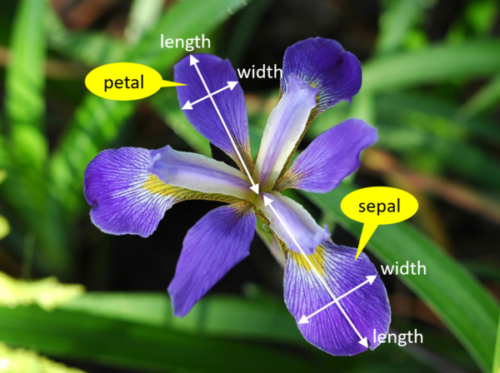


source: https://www.integratedots.com/determine-number-of-iris-species-with-k-means/

We are looking at a classification problem next, which will be based on the iris flower. The dataset is contained within sklearn, and we will have 150 rows of 5 columns (4 X columns and 1 y column).

The target column will be the species of the iris flower, and there are 3 labels/classes any given flower can belong to, within this dataset.

In [74]:
import pandas as pd
from sklearn.datasets import load_iris

In [75]:
# instantiating default iris data into iris_ori
iris_ori = load_iris()

In [76]:
# extracting X columns from iris_ori
iris_X = iris_ori.data
iris_X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [77]:
# converting iris_X into dataframe
iris_X = pd.DataFrame(iris_ori.data, columns = iris_ori.feature_names)
iris_X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [78]:
iris_y = iris_ori.target
iris_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [79]:
# we can also extract label names for the target variable
y_labels = iris_ori.target_names
y_labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [80]:
# joining them all into df_iris_ori
df_iris_ori = iris_X.copy()
df_iris_ori["species"] = iris_y
df_iris_ori

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Train Test Split

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.25, random_state=123)

In [82]:
# lets examine X_train

print(X_train.shape)
print(type(X_train))
X_train[0:5]

(112, 4)
<class 'pandas.core.frame.DataFrame'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
16,5.4,3.9,1.3,0.4
82,5.8,2.7,3.9,1.2
60,5.0,2.0,3.5,1.0
35,5.0,3.2,1.2,0.2
143,6.8,3.2,5.9,2.3


In [83]:
# lets examine X_test

print(X_test.shape)
print(type(X_test))
X_test[0:5]

(38, 4)
<class 'pandas.core.frame.DataFrame'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
72,6.3,2.5,4.9,1.5
112,6.8,3.0,5.5,2.1
132,6.4,2.8,5.6,2.2
88,5.6,3.0,4.1,1.3
37,4.9,3.6,1.4,0.1


In [84]:
# lets examine y_train

print(y_train.shape)
print(type(y_train))
y_train[0:5]

(112,)
<class 'numpy.ndarray'>


array([0, 1, 1, 0, 2])

In [85]:
# lets examine y_test

print(y_test.shape)
print(type(y_test))
y_test[0:5]

(38,)
<class 'numpy.ndarray'>


array([1, 2, 2, 1, 0])

## Classification

### 8i) Building a Predictive Model for Classification

### Naive Baseline Model (for Classification, typically predicts Modal Class for every single prediction)

It is done purposely without much thought or mathematics, so that it establishes the first baseline, for your Machine Learning model to beat.

In [86]:
import numpy as np
from scipy import stats

# pick the modal class from train data
print(stats.mode(y_train))

modal_class_label = stats.mode(y_train)[0]

print(f"The modal class label is {int(modal_class_label)}, \
and the accompanying string value of this label is {y_labels[modal_class_label]}.")

ModeResult(mode=array([1]), count=array([42]))
The modal class label is 1, and the accompanying string value of this label is ['versicolor'].


C:\Users\liu nelson\AppData\Local\Temp\ipykernel_20352\293264656.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(stats.mode(y_train))
C:\Users\liu nelson\AppData\Local\Temp\ipykernel_20352\293264656.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mod

In [87]:
y_train_preds_naive = [int(modal_class_label) for row in X_train.iloc[:,0]]
y_train_preds_naive[0:5]

[1, 1, 1, 1, 1]

In [88]:
y_test_preds_naive = [int(modal_class_label) for row in X_test.iloc[:,0]]
y_test_preds_naive[0:5]

[1, 1, 1, 1, 1]

In [89]:
# scoring accuracy of model
# note that other metrics exist, eg. AUC-ROC, Confusion Matrix-Based Metrics, but these matter more for imbalanced data
# where classes don't share same representation, eg. class 0 is 80%, class 1 is 10%, class 2 is 10%
# and are advanced Machine Learning topics

from sklearn.metrics import accuracy_score

# train accuracy score
y_true = y_train
y_pred = y_train_preds_naive

train_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_naive

test_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:.2f}%.")

The Naive Baseline Model's accuracy on train data is 37.50%.
The Naive Baseline Model's accuracy on test data is 21.05%.


### Logistic Regression Model (Multinomial Version for Multi-Class in Target)

In [90]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear') # you can experiment with different combinations of multi_class and solver
# logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs') # good option for larger datasets, fails here
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [91]:
y_train_preds_logreg = logreg.predict(X_train)
y_test_preds_logreg = logreg.predict(X_test)

### 8ii) Determine Accuracy of Model

In [92]:
# train accuracy score
y_true = y_train
y_pred = y_train_preds_logreg

train_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on train data is {train_accuracy_logreg:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_logreg

test_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on test data is {test_accuracy_logreg:.2f}%.")

The LogReg Model's accuracy on train data is 95.54%.
The LogReg Model's accuracy on test data is 97.37%.


## Beneath the Hood of the Model

In [93]:
logreg.predict_proba(X_train)

array([[9.13813816e-01, 8.61761645e-02, 1.00196309e-05],
       [5.66108418e-02, 8.11317204e-01, 1.32071954e-01],
       [3.21349399e-02, 7.57344170e-01, 2.10520890e-01],
       [8.14240390e-01, 1.85734751e-01, 2.48597473e-05],
       [3.96911877e-04, 2.65510817e-01, 7.34092271e-01],
       [1.51134728e-03, 2.87425039e-01, 7.11063614e-01],
       [1.07552333e-03, 3.21490526e-01, 6.77433951e-01],
       [8.23917609e-04, 2.05003345e-01, 7.94172738e-01],
       [8.40384906e-04, 1.65150817e-01, 8.34008798e-01],
       [1.51071369e-02, 6.58646690e-01, 3.26246173e-01],
       [8.95602516e-01, 1.04374232e-01, 2.32519521e-05],
       [8.04069913e-01, 1.95820575e-01, 1.09512695e-04],
       [3.74474476e-03, 3.43307466e-01, 6.52947789e-01],
       [8.33005650e-01, 1.66872618e-01, 1.21731964e-04],
       [7.64664531e-01, 2.35283845e-01, 5.16240570e-05],
       [1.94670032e-02, 7.70317677e-01, 2.10215320e-01],
       [1.64427110e-02, 6.63957857e-01, 3.19599432e-01],
       [2.30359016e-02, 6.73247

In the matrix above, each row corresponds to a single observation. 

The first column is the probability of the predicted output being class 0 ('setosa'), then second column probability of the predicted output being class 1 ('versicolor'), with the third column being the probability of the predicted output being class 2 ('virginica').

Note that all 3 columns probability within the same row will sum up to 1.0, as they represent the combined pool which the flower can belong to.

This has been a very successful classification predictive model, we have predicted >95% of the time correctly on train data, and >97% of the time correct on test data, which species the flower belonged to.

[Back to top](#contentpage)

## End of Notebook